#### Université de Bordeaux,  Master Mention Informatique,  2021-2022

# Analyse, classification et indexation des données: feuille 3
### Descente de gradient

##### Avant de commencer :
La méthode de la descente de gradient permet de trouver un minimum local d’une fonction de ${\mathbb R}^n$ dans ${\mathbb R}$ . L’objectif de ce TD est de comprendre cette méthode pour pouvoir l’utiliser par la suite dans différentes applications où on cherche à minimiser un critère.


Comme précédemment nous utilisons entre autres <code>numpy</code> pour manipuler vecteurs et matrices.

In [1]:
import numpy as np

### Exercice 1. Polynôme :  calcul et dérivée

1. Ecrivez une fonction python <code>valeurPolynome (coeff, x)</code> qui calcule la valeur du polynôme défini par le vecteur de coefficients <code>coeff</code> pour la valeur <code>x</code>. Les coefficients sont rangés dans l'ordre des puissances croissantes. Par exemple le vecteur $[1, 2, 3]$ définit le polynôme $3x^2+2x+1$. <br>Utilisez pour cela la classe <code>Polynomial</code> du module <code>numpy.polynomial</code>.

In [2]:
def valeurPolynome (coeff, x):
    polynome = np.polynomial.Polynomial(coeff)
    return polynome(x)
    #resultat=coeff[0]
    #for i in range (1,len(coeff)):
    #    resultat=resultat+coeff[i]*x**i
    #return resultat

2. Testez cette fonction pour différentes valeurs de <code>x</code> et pour un polynôme dont vous choisirez les coefficients. Remarquez que le paramètre <code>x</code> peut lui même être un vecteur ou une matrice.

In [3]:
M= np.linspace(0, 10, 9)
print(M)
polynome=[1,2,3]
print("resultat polynome = ",valeurPolynome(polynome,M))

[ 0.    1.25  2.5   3.75  5.    6.25  7.5   8.75 10.  ]
resultat polynome =  [  1.       8.1875  24.75    50.6875  86.     130.6875 184.75   248.1875
 321.    ]


3. La dérivée d’un polynôme est elle même un polynôme. Toujours en utilisant la classe <code>Polynomial</code>, écrivez une fonction python <code>derivPoly(coeff)</code> qui retourne le tableau de coefficients représentant la dérivée du polynôme défini par <code>coeff</code>. Testez.

In [4]:
def derivPoly(coeff):
    polynome = np.polynomial.Polynomial(coeff)
    derivative = polynome.deriv()
    derivative_coeff = derivative.coef
    return derivative_coeff

print("resultat dérivé polynome = ",derivPoly(polynome))

resultat dérivé polynome =  [2. 6.]


### Exercice 2. Descente de gradient pour trouver le minimum d’une parabole

1. Exécutez le script python suivant : 

In [11]:
import numpy as np
%matplotlib 
import matplotlib.pyplot as plt

def parabole(x):
    return x * x

x = np.linspace(-300,300,600)
y = [parabole(i) for i in x]

epsilon = 0.1
nu = 0.1

plt.plot(x,y,'g')

x0=250
xcurrent = x0 - 2*x0
xprec = x0

plt.plot(x0,parabole(x0),'ok')


while(abs(xprec - xcurrent) > epsilon):
    xprec  = xcurrent
    xcurrent = xprec - nu*2*xprec
    plt.plot(xcurrent,parabole(xcurrent),'ob')
    plt.pause(1)
    
plt.plot(xcurrent,parabole(xcurrent),'xr')
print(xcurrent)

Using matplotlib backend: TkAgg
-0.3868562622766814


2. Retrouvez dans le code les étapes de l’algorithme de descente du gradient en repérant bien l'utilisation de la dérivée.
3. Testez en modifiant l’initialisation de la position du minimum.
4. Comment peut-on obtenir une estimation plus précise de la position du minimum?
5. Testez en modifiant la variable <code>nu</code> par une autre valeur constante inférieure à 1, par exemple <code> nu = 0.6</code>.
Que se passe-t-il si la valeur de nu est fixée à 1 ? Est-ce spécifique à la fonction choisie ?
6. Comparez la version suivante du script avec la précédente

2. la dérivé est ici - nu*2*xprec
3. epsilon est la précison de la derivé 
4. nu est le pas d'apprentissage, soit le pas de recherche du minimum ou la vitesse
   on diminue epsilon pour aujouter de la précision
5. si il est a 1, alors renvoie la valeurs d'en face. 
6. 

In [37]:
import numpy as np
%matplotlib
import matplotlib.pyplot as plt

def parabole(x):
    return x * x

x = np.linspace(-300,300,600)
y = [parabole(i) for i in x]

epsilon = 0.1
attenuation = 3

plt.plot(x,y,'g')

x0=250
xcurrent = x0 - 2*x0
xprec = x0

plt.plot(x0,parabole(x0),'ok')

while(abs(xprec - xcurrent) > epsilon):
    xprec  = xcurrent
    nu = 1/np.log(attenuation)
    attenuation = attenuation+1
    xcurrent = xprec - nu*2*xprec
    plt.plot(xcurrent,parabole(xcurrent),'ob')
    plt.pause(0.1)
plt.plot(xcurrent,parabole(xcurrent),'xr')


Using matplotlib backend: TkAgg


KeyboardInterrupt: 

7. Comment évolue la variable <code>nu</code> au fur et à mesure des itérations ? Quel est l'intérêt de procéder ainsi?


nu s'adpate a la courbe de la dérivé

### Exercice 3. Descente de gradient pour trouver le minimum d’un polynôme

1. On choisit comme exemple le polynôme $30 − 61x + 41x^2 − 11x^3 + x^4$ . Ecrivez un script python
qui affiche ce polynôme entre 0 et 6 et qui montre les étapes de la descente de gradient à partir de la valeur initiale 5.

In [ ]:
import numpy as np
%matplotlib
import matplotlib.pyplot as plt

def parabole(x):
    return 30 - 61 * x + 41 * x**2 - 11 * x**3 + x**4

def df(x):
    return 61 * x + 82 * x- 33 * x**2 + 4*x**3

x = np.linspace(0,6,600)
y = [parabole(i) for i in x]

epsilon = 0.1
nu = 0.1

plt.plot(x,y,'g')

x0=5
xcurrent = x0 - nu * (4 * x0**3 - 33 * x0**2 + 82 * x0 - 61)
xprec = x0

plt.plot(x, parabole(x), 'g', label='Polynôme')
plt.plot(x0, parabole(x0), 'ok', label='Point de départ')
plt.plot(xcurrent, parabole(xcurrent), 'ob', label='Point courant')


while(abs(xprec - xcurrent) > epsilon):
    x0 = xcurrent
    xcurrent = x0 - nu * (4 * x0**3 - 33 * x0**2 + 82 * x0 - 61)
    plt.plot(xcurrent, parabole(xcurrent), 'ob')
    plt.pause(0.01)
plt.plot(xcurrent, parabole(xcurrent), 'xr', label='Minimum trouvé')

Using matplotlib backend: TkAgg


Exception in Tkinter callback
Traceback (most recent call last):
  File "/usr/lib/python3.11/tkinter/__init__.py", line 1948, in __call__
    return self.func(*args)
           ^^^^^^^^^^^^^^^^
  File "/usr/lib/python3.11/tkinter/__init__.py", line 861, in callit
    func(*args)
  File "/usr/lib/python3/dist-packages/matplotlib/backends/_backend_tk.py", line 251, in idle_draw
    self.draw()
  File "/usr/lib/python3/dist-packages/matplotlib/backends/backend_tkagg.py", line 10, in draw
    super().draw()
  File "/usr/lib/python3/dist-packages/matplotlib/backends/backend_agg.py", line 405, in draw
    self.figure.draw(self.renderer)
  File "/usr/lib/python3/dist-packages/matplotlib/artist.py", line 74, in draw_wrapper
    result = draw(artist, renderer, *args, **kwargs)
             ^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^
  File "/usr/lib/python3/dist-packages/matplotlib/artist.py", line 51, in draw_wrapper
    return draw(artist, renderer)
           ^^^^^^^^^^^^^^^^^^^^^^
  File "/usr/


2. Changez la valeur initiale à 0.
3. Faites varier les paramètres de la descente de gradient (taux d'apprentissage, test d’arrêt) et commentez le
comportement de l’algorithme.

    Taux d'apprentissage (eta): Si vous augmentez eta, l'algorithme peut converger plus rapidement, mais il peut aussi devenir instable ou diverger. Si vous diminuez eta, l'algorithme peut converger plus lentement mais de manière plus stable. Il est important de choisir un eta approprié en fonction de la forme de la fonction que vous optimisez.

    Critère d'arrêt (epsilon): En augmentant epsilon, vous permettez à l'algorithme de s'arrêter plus tôt, même s'il n'a pas encore atteint une convergence très précise. En diminuant epsilon, l'algorithme prendra plus de temps pour converger vers une solution plus précise.

    Terme de momentum (gamma): Le terme de momentum permet d'accélérer la convergence et d'éviter de rester coincé dans des minima locaux, mais un gamma trop élevé peut rendre l'algorithme instable. Vous pouvez ajuster gamma en fonction de la régularité de votre fonction.
    
    la variable v représente la vitesse ou la vélocité de la mise à jour des paramètres. Plus précisément, v est utilisée pour accumuler l'influence des gradients précédents et pour accélérer ou ralentir le mouvement lors de la mise à jour des paramètres.

### Exercice 4. Descente de gradient pour trouver le minimum d’une surface

1. On choisit comme exemple la fonction définie par $f(x,y) = (x−1)(x−2)+(y+3)(y+4)$. On visualise une partie de la surface correspondante avec le code ci-dessous. Quels sont les intervalles de variation de $x$ et $y$ dans ce code? Quelles sont les coordonnées du minimum ?

In [9]:
import numpy as np
%matplotlib
import matplotlib.pyplot as plt

from mpl_toolkits.mplot3d import Axes3D

def f(x,y):
    return (x - 1) * (x - 2) + (y + 3) * (y + 4)

x = np.linspace(-8, 8, 160) 
y = np.linspace(-8, 8, 160)
x, y = np.meshgrid(x, y)

z = f(x, y)

fig = plt.figure()
ax = fig.add_subplot(111,projection='3d')

ax.plot_surface(x, y, z) 
plt.show()


Using matplotlib backend: TkAgg


2. Ecrivez une fonction python <code>animationDescenteSurface(pdep)</code> qui affiche cette surface et qui montre les étapes de la descente de gradient à partir du point initial <code>pdep</code> donné comme vecteur de deux coordonnées. Pour afficher un point 3D vous utiliserez la fonction <code>scatter</code> de <code>Axes3D</code>.

In [2]:
import numpy as np
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D

# Fonction à optimiser
def f(x, y):
    return (x - 1) * (x - 2) + (y + 3) * (y + 4)

# Gradient de la fonction
def gradient(x, y):
    df_dx = 2 * (x - 1) + 0
    df_dy = 0 + 2 * (y + 3)
    return np.array([df_dx, df_dy])

# Descente de gradient
def descente_gradient(pdep, taux_apprentissage, iterations):
    trajectoire = [pdep]
    for _ in range(iterations):
        gradient_p = gradient(pdep[0], pdep[1])
        pdep = pdep - taux_apprentissage * gradient_p
        trajectoire.append(pdep)
    return np.array(trajectoire)

def animationDescenteSurface(pdep):
    x = np.linspace(-8, 8, 160)
    y = np.linspace(-8, 8, 160)
    x, y = np.meshgrid(x, y)

    z = f(x, y)

    fig = plt.figure()
    ax = fig.add_subplot(111, projection='3d')

    # Affichage de la surface
    ax.plot_surface(x, y, z, cmap='viridis')

    # Descente de gradient
    trajectoire = descente_gradient(pdep, taux_apprentissage=0.1, iterations=50)

    # Affichage de la trajectoire
    ax.scatter(trajectoire[:, 0], trajectoire[:, 1], f(trajectoire[:, 0], trajectoire[:, 1]), c='r', marker='o')

    plt.show()

# Point initial pour la descente de gradient
point_initial = np.array([7.0, 7.0])

# Appel de la fonction d'animation
animationDescenteSurface(point_initial)

    

3. Testez avec comme point initial <code>pdep = (1, -5)</code> puis <code>(-1, -3)</code>, <code>(-1, -5)</code> et <code>(2, -4)</code>.

In [9]:

pdep = np.array((1, -5))
print(f"Point initial: {(1, -5)}")
animationDescenteSurface((1, -5))


Point initial: (1, -5)


In [ ]:
pdep = np.array((-1, -3))
print(f"Point initial: {(-1, -3)}")
animationDescenteSurface((-1, -3))


In [ ]:
pdep = np.array((-1, -5))
print(f"Point initial: {(-1, -5)}")
animationDescenteSurface((-1, -5))


In [ ]:
pdep = np.array((2, -4))
print(f"Point initial: {(2, -4)}")
animationDescenteSurface((2, -4))


### Exercice 5. Application : régression linéaire

On veut calculer la droite de régression linéaire correspondant à un nuage de
points 2D $\{(x_1, y_1), \cdots , (x_m, y_m)\}$, c'est-à-dire la droite $y = \theta_1x + \theta_0$ qui minimise le critère suivant : 
$$
\frac 1 m \sum \left( \theta_0 + \theta_1 x_i - y_i\right)^2.
$$

Autrement dit, on cherche à minimiser la moyenne des distances verticales entre chaque point du nuage et la droite. <br>
Utilisez une descente de gradient (en 2D) pour trouver les caractéristiques $\theta_0$ et $\theta_1$ de la droite de régression linéaire correspondant à un nuage de points. Pour générer un nuage de point, vous pouvez utiliser le code suivant :

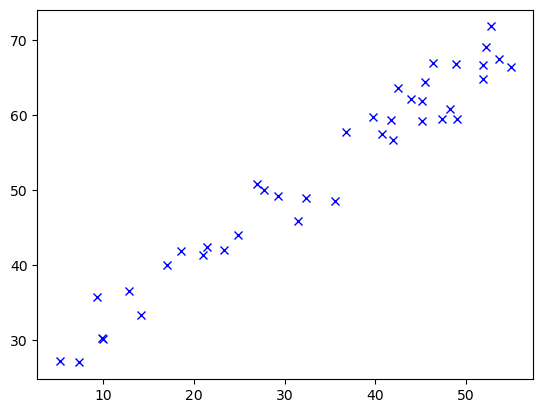

In [4]:
from random import random
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D
import numpy as np

m = 40
sizeNoise = 10
x = [random()*50 + 5 for i in range(m)]
noise = [random() * sizeNoise for i in range(m)] # ou np.rand(m,1) * sizeNoise
pente = 0.8
b =  20
y = [b + pente*x[i] + noise[i] for i in range(m)] 

plt.plot(x,y,'bx')

Iteration 1/1, Coût : 1209.312094042397


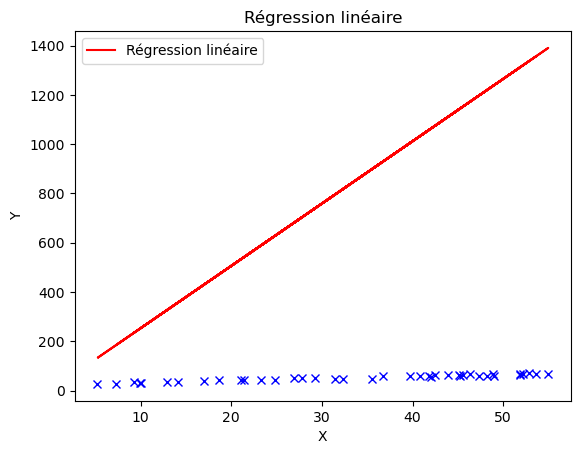

Pente apprise : 25.270795975649797
Biais appris : 0.8089776849694053


In [18]:
# Définir la fonction de coût (MSE)
def mean_squared_error(y_true, y_pred):
    return ((y_true - y_pred) ** 2).mean()

# Définir le taux d'apprentissage
learning_rate = 0.01

# Nombre d'itérations de la descente de gradient
num_iterations = 1

# Stockage de l'historique des coûts pour la visualisation
cost_history = []

pente = np.random.rand()  # Initialisation aléatoire
b = np.random.rand()      # Initialisation aléatoire

X = np.array(x)
Y = np.array(y)

# Descente de gradient
for _ in range(num_iterations):
    # Calculer les prédictions du modèle
    y_pred = b + pente * X
    
    # Calculer les gradients par rapport à la pente et au biais
    gradient_pente = -2/m * np.sum((Y - y_pred) * X)
    gradient_b = -2/m * np.sum(Y - y_pred)
    
    # Mettre à jour les paramètres en utilisant le taux d'apprentissage
    pente -= learning_rate * gradient_pente
    b -= learning_rate * gradient_b
    
    # Calculer la valeur actuelle de la fonction de coût
    cost = mean_squared_error(Y, y_pred)
    cost_history.append(cost)
    
    # Afficher la valeur de la fonction de coût à chaque itération (pour surveillance)
    print(f'Iteration {_+1}/{num_iterations}, Coût : {cost}')

# Tracer l'évolution du coût au fil des itérations
plt.plot(X, Y, 'bx')
y_regression = b + pente * X
plt.plot(X, y_regression, label='Régression linéaire', color='red')

plt.xlabel('X')
plt.ylabel('Y')
plt.legend()
plt.title('Régression linéaire')
plt.show()
# Afficher les paramètres appris
print(f'Pente apprise : {pente}')
print(f'Biais appris : {b}')

In [6]:
# Création des points de la droite de régression
X_regression = np.linspace(min(X), max(X), 100)
Y_regression = theta1 * X_regression + theta0

# Tracé du nuage de points et de la droite de régression
plt.plot(X, Y, 'bx')
plt.plot(X_regression, Y_regression, label='Régression linéaire', color='red')
plt.xlabel('X')
plt.ylabel('Y')
plt.title('Régression Linéaire')
plt.legend()
plt.show()

NameError: name 'X' is not defined

REGRESSION SANS GRADIENT

In [7]:
import numpy as np

# Données d'exemple
X = np.array(x)
Y = np.array(y)

# Calcul des moyennes de X et Y
X_mean = np.mean(X)
Y_mean = np.mean(Y)

# Calcul des coefficients de la droite de régression
numerator = np.sum((X - X_mean) * (Y - Y_mean))
denominator = np.sum((X - X_mean)**2)
theta1 = numerator / denominator
theta0 = Y_mean - theta1 * X_mean

# Équation de la droite de régression
print(f"Équation de la droite de régression : Y = {theta1:.2f} * X + {theta0:.2f}")

# Utilisation de la régression pour faire une prédiction
X_new = 6
Y_pred = theta1 * X_new + theta0
print(f"Prédiction pour X = {X_new}: Y = {Y_pred:.2f}")

Équation de la droite de régression : Y = 0.83 * X + 24.10
Prédiction pour X = 6: Y = 29.06


In [26]:
# Création des points de la droite de régression
X_regression = np.linspace(min(X), max(X), 100)
Y_regression = theta1 * X_regression + theta0

# Tracé du nuage de points et de la droite de régression
plt.plot(X, Y, 'bx')
plt.plot(X_regression, Y_regression, label='Régression linéaire', color='red')
plt.xlabel('X')
plt.ylabel('Y')
plt.title('Régression Linéaire')
plt.legend()
plt.show()